In [23]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import seaborn as sns

In [24]:
df_brent = pd.read_csv("./processed_tables/brent.csv")
df_precios = pd.read_csv("./processed_tables/precios.csv")
df_precipitacion = pd.read_csv("./processed_tables/precipitacion.csv")
df_temperatura = pd.read_csv("./processed_tables/temperatura.csv")
df_trm = pd.read_csv("./processed_tables/TRM.csv")

In [25]:
df_brent = df_brent.rename(columns={"Fecha": "Date"})
df_precipitacion = df_precipitacion.rename(columns={"date": "Date"})
df_temperatura = df_temperatura.rename(columns={"date": "Date"})
df_trm = df_trm.rename(columns={"vigenciadesde": "Date"})

# Perform left joins
df_merged = pd.merge(df_precios, df_brent, on="Date", how="left")
df_merged = pd.merge(df_merged, df_precipitacion, on="Date", how="left")
df_merged = pd.merge(df_merged, df_temperatura, on="Date", how="left")
df_merged = pd.merge(df_merged, df_trm, on="Date", how="left")

In [26]:
df_merged.to_csv("processed_tables/merged.csv", index=False)

In [27]:
df_merged.columns

Index(['Date', 'energy_price', 'brent_value', 'precipitacion_unidadmedida',
       'precipitacion_amazonas', 'precipitacion_arauca',
       'precipitacion_atlantico', 'precipitacion_bogota',
       'precipitacion_bolivar', 'precipitacion_caqueta',
       'precipitacion_casanare', 'precipitacion_cesar', 'precipitacion_choco',
       'precipitacion_guainia', 'precipitacion_guaviare',
       'precipitacion_la guajira', 'precipitacion_magdalena',
       'precipitacion_meta', 'precipitacion_narino',
       'precipitacion_norte de santander', 'precipitacion_putumayo',
       'precipitacion_quindio', 'precipitacion_risaralda',
       'precipitacion_san andres providencia', 'precipitacion_sucre',
       'precipitacion_vaupes', 'precipitacion_vichada',
       'precipitacion_departamentos_represa', 'temp_AMAZONAS', 'temp_ARAUCA',
       'temp_ARCHIPIELAGO DE SAN ANDRES PROVIDENCIA Y SANTA CATALINA',
       'temp_ATLANTICO', 'temp_BOGOTA', 'temp_BOLIVAR', 'temp_CAQUETA',
       'temp_CASANARE', '

In [28]:
df_merged.shape

(644, 52)

In [29]:
print(f"Fecha mínima: {df_merged.loc[0]['Date']}")

Fecha mínima: 2021-10-01


In [30]:
print(f"Fecha máxima: {df_merged.loc[df_merged.shape[0] - 1]['Date']}")

Fecha máxima: 2023-09-30


In [31]:
df_merged.describe()

,energy_price,brent_value,precipitacion_amazonas,precipitacion_arauca,precipitacion_atlantico,precipitacion_bogota,precipitacion_bolivar,precipitacion_caqueta,precipitacion_casanare,precipitacion_cesar,...,temp_META,temp_NARINO,temp_NORTE DE SANTANDER,temp_PUTUMAYO,temp_QUINDIO,temp_RISARALDA,temp_SUCRE,temp_VICHADA,temp_avg_represas,TRM
count,644.000000,644.000000,644.000000,644.000000,644.000000,644.000000,644.000000,644.000000,644.000000,644.000000,...,644.000000,644.000000,644.000000,644.000000,644.000000,644.000000,644.000000,644.000000,644.000000,644.000000
mean,322.121164,89.611661,6.400516,10.241483,40.353079,10.732652,47.941181,17.652089,63.382711,23.383042,...,27.907349,20.107569,25.823510,27.823546,26.534008,26.457596,32.580889,30.547821,24.899482,4313.503168
std,241.618420,12.144518,10.791224,15.760833,92.093514,18.775336,75.967073,33.094526,82.616821,58.539379,...,2.306036,2.133082,3.644461,2.869805,2.950855,2.582673,2.228982,2.634650,1.997670,374.097100
min,87.255265,70.930000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,21.044440,7.600000,15.055556,11.953600,15.400000,13.733333,24.333333,22.800000,15.752039,3706.950000
25%,133.920626,80.808750,0.119000,0.000000,5.000000,0.435000,5.080000,0.200000,9.565000,0.200000,...,26.585867,19.082206,23.635557,26.500000,24.820119,25.166860,31.490000,28.285000,23.990580,3972.902500
50%,239.984244,85.955000,2.367000,3.050000,16.125000,3.925000,19.515000,5.250000,38.023000,3.700000,...,28.069519,20.307821,25.107536,28.117632,26.294401,26.476529,33.000000,30.900000,24.913238,4303.340000
75%,435.658130,95.925000,9.266018,16.600000,34.004888,11.805000,62.892500,19.410911,93.165000,29.170744,...,29.668946,21.496974,27.813761,29.700000,28.308820,28.209095,34.100000,32.600000,26.108156,4636.830000
max,1061.527174,123.440000,102.080000,152.100000,1120.190000,188.700000,701.920000,284.800000,880.445000,724.500000,...,33.926386,25.931133,36.950000,34.300000,34.032470,31.901733,37.275000,37.100000,29.951683,5061.210000


### Corrleción variables explicativas con variable dependiente con data estándarizada


In [32]:
scaler = StandardScaler()
df_to_corr=df_merged.drop(columns={"Date","precipitacion_unidadmedida"})
scaled_df_complete = scaler.fit_transform(df_to_corr)
scaled_df_complete = pd.DataFrame(scaled_df_complete, columns=df_to_corr.columns)
#scaled_df_complete.corr().style.background_gradient(cmap="coolwarm",vmin=-1,vmax=1)
scaled_df_complete.corr()[:1].T.sort_values(by="energy_price",ascending=False).style.background_gradient(cmap="coolwarm",vmin=-1,vmax=1)

,energy_price
energy_price,1.000000
temp_NORTE DE SANTANDER,0.576889
temp_QUINDIO,0.461427
temp_avg_represas,0.448470
temp_CESAR,0.402348
temp_BOGOTA,0.384643
temp_BOLIVAR,0.324716
temp_GUAVIARE,0.321827
temp_ATLANTICO,0.318033
temp_MAGDALENA,0.309976


### Correlación entre variables explicativas.

Se analiza con el objetivo de quitar variables altamente correlacionadas para evitar multicolinealidad.

In [33]:
precipitacion_columns = df_merged.filter(like="precipitacion_")
temp_columns = df_merged.filter(like="temp_")
specific_columns_df = df_merged[["brent_value", "TRM"]]
exogen_data = pd.concat(
    [precipitacion_columns, temp_columns, specific_columns_df], axis=1
)
exogen_data.drop("precipitacion_unidadmedida", axis=1, inplace=True)

## Estandarización de la data

Para empezar a modelar la data, se debe estandarizar los datos, para ello se utilizará la librería `sklearn.preprocessing`, la cual nos permite estandarizar los datos de una manera sencilla.


In [34]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(exogen_data)
scaled_df = pd.DataFrame(scaled_data, columns=exogen_data.columns)
scaled_df

,precipitacion_amazonas,precipitacion_arauca,precipitacion_atlantico,precipitacion_bogota,precipitacion_bolivar,precipitacion_caqueta,precipitacion_casanare,precipitacion_cesar,precipitacion_choco,precipitacion_guainia,...,temp_NARINO,temp_NORTE DE SANTANDER,temp_PUTUMAYO,temp_QUINDIO,temp_RISARALDA,temp_SUCRE,temp_VICHADA,temp_avg_represas,brent_value,TRM
0,-0.509005,0.759339,0.139390,-0.557688,4.888002,-0.530775,-0.284457,-0.030483,0.599807,-0.518613,...,1.267949,0.196452,0.584624,-0.132406,0.000597,1.422880,0.323702,-0.114337,-0.917312,-1.339552
1,-0.593583,1.622908,-0.161734,-0.569948,5.703726,-0.437031,-0.355927,0.273823,1.312841,-0.217009,...,1.044002,0.036264,0.758987,-0.077677,0.701471,0.203140,1.159376,0.619803,-0.917312,-1.423606
2,-0.538867,1.559410,-0.248126,-0.567816,3.445073,-0.527751,-0.198452,-0.324530,0.818475,-0.402611,...,1.926640,0.207090,1.561059,-0.136915,0.869386,1.939212,1.159376,0.950203,-0.917312,-1.423606
3,-0.580600,1.718155,-0.183251,-0.287443,3.802742,-0.300951,0.339387,-0.336497,0.724237,-0.472212,...,1.612333,0.213532,0.863605,0.110949,0.588202,2.107581,0.057805,0.723472,-0.761153,-1.423606
4,0.016831,2.981760,0.521690,-0.560886,0.362265,0.158697,-0.180160,0.179796,0.586998,-0.565013,...,0.717358,-0.146140,-0.008211,-1.183151,-0.106008,-0.365573,-0.701899,-0.197147,-0.614059,-1.411032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
639,0.847595,-0.631262,-0.323217,-0.572080,0.542219,-0.003994,-0.336545,-0.374108,0.015473,-0.611413,...,-0.034829,2.918058,1.665677,1.158528,1.062673,-0.530200,1.767140,1.666261,0.279630,-0.698124
640,-0.593583,-0.555064,-0.213895,0.936388,-0.232402,-0.066289,-0.323221,-0.399752,0.015473,-0.611413,...,0.708023,1.819649,1.909785,1.277229,1.740792,-0.305708,0.171761,1.783337,0.491825,-0.654812
641,-0.491569,-0.174078,-0.407219,0.227461,-0.007129,-0.066894,0.188816,-0.380946,0.015473,-0.611413,...,-0.543096,1.847109,0.654369,-0.130236,-0.913561,0.188174,1.197362,1.326154,0.544977,-0.588281
642,3.330243,-0.574114,-0.303222,-0.518777,-0.378631,-0.340868,-0.472216,-0.399752,0.138073,-0.611413,...,-0.660389,1.764729,0.410261,1.650293,2.012040,0.592260,0.517426,1.808617,0.491825,-0.609762


In [35]:
scaled_df.cov()

,precipitacion_amazonas,precipitacion_arauca,precipitacion_atlantico,precipitacion_bogota,precipitacion_bolivar,precipitacion_caqueta,precipitacion_casanare,precipitacion_cesar,precipitacion_choco,precipitacion_guainia,...,temp_NARINO,temp_NORTE DE SANTANDER,temp_PUTUMAYO,temp_QUINDIO,temp_RISARALDA,temp_SUCRE,temp_VICHADA,temp_avg_represas,brent_value,TRM
precipitacion_amazonas,1.001555,-0.066191,-0.075131,0.106628,-0.033421,-0.022749,-0.013532,-0.015310,0.083181,-0.059639,...,0.102052,-0.008484,0.041793,-0.011271,0.026760,0.104096,-0.016484,0.036455,0.015203,-0.011634
precipitacion_arauca,-0.066191,1.001555,0.017738,0.045786,0.247773,0.209618,0.208907,0.061259,-0.017647,0.108003,...,0.084998,0.017754,-0.094839,-0.038259,0.000819,0.021908,0.022720,-0.065313,0.034978,-0.261270
precipitacion_atlantico,-0.075131,0.017738,1.001555,0.013373,0.119354,0.019560,0.052925,0.036554,0.085810,0.116756,...,0.041169,-0.052099,0.087134,-0.092169,-0.067516,-0.184989,0.095596,-0.082364,0.115646,-0.007311
precipitacion_bogota,0.106628,0.045786,0.013373,1.001555,0.074311,0.104891,0.118155,0.109288,-0.002046,0.059356,...,0.033023,-0.155419,0.010909,-0.152240,-0.101085,-0.036298,-0.082724,-0.158058,0.252581,-0.042178
precipitacion_bolivar,-0.033421,0.247773,0.119354,0.074311,1.001555,0.063905,0.092061,0.142962,-0.004285,0.073235,...,0.043443,-0.110220,-0.008467,-0.202183,-0.137568,-0.192047,0.036665,-0.199382,0.191432,-0.167001
precipitacion_caqueta,-0.022749,0.209618,0.019560,0.104891,0.063905,1.001555,0.229496,0.085323,-0.036160,0.146705,...,-0.056930,0.004889,-0.195668,-0.056701,-0.046964,-0.062599,-0.034148,-0.112516,0.051162,-0.007921
precipitacion_casanare,-0.013532,0.208907,0.052925,0.118155,0.092061,0.229496,1.001555,0.018476,0.199215,0.142158,...,-0.037646,0.191361,-0.128797,0.117605,0.081525,0.013928,-0.077804,0.050146,0.006292,-0.042485
precipitacion_cesar,-0.015310,0.061259,0.036554,0.109288,0.142962,0.085323,0.018476,1.001555,-0.048320,0.095745,...,-0.155468,-0.066035,-0.023077,-0.107385,-0.120010,-0.073939,0.037488,-0.149425,0.204739,-0.111739
precipitacion_choco,0.083181,-0.017647,0.085810,-0.002046,-0.004285,-0.036160,0.199215,-0.048320,1.001555,-0.007066,...,0.196542,0.272956,0.103867,0.281693,0.229243,0.210150,0.041753,0.285749,-0.313040,-0.079837
precipitacion_guainia,-0.059639,0.108003,0.116756,0.059356,0.073235,0.146705,0.142158,0.095745,-0.007066,1.001555,...,-0.018807,-0.006063,-0.082567,-0.023039,0.017652,-0.015805,-0.045641,-0.039057,0.135186,-0.082387


In [36]:
scaled_df_corr = scaled_df.corr()
print("Correlation Matrix Original: ", scaled_df_corr.shape)
scaled_df_corr.style.background_gradient(cmap="coolwarm")


Correlation Matrix Original:  (49, 49)


,precipitacion_amazonas,precipitacion_arauca,precipitacion_atlantico,precipitacion_bogota,precipitacion_bolivar,precipitacion_caqueta,precipitacion_casanare,precipitacion_cesar,precipitacion_choco,precipitacion_guainia,precipitacion_guaviare,precipitacion_la guajira,precipitacion_magdalena,precipitacion_meta,precipitacion_narino,precipitacion_norte de santander,precipitacion_putumayo,precipitacion_quindio,precipitacion_risaralda,precipitacion_san andres providencia,precipitacion_sucre,precipitacion_vaupes,precipitacion_vichada,precipitacion_departamentos_represa,temp_AMAZONAS,temp_ARAUCA,temp_ARCHIPIELAGO DE SAN ANDRES PROVIDENCIA Y SANTA CATALINA,temp_ATLANTICO,temp_BOGOTA,temp_BOLIVAR,temp_CAQUETA,temp_CASANARE,temp_CESAR,temp_CHOCO,temp_GUAINIA,temp_GUAVIARE,temp_LA GUAJIRA,temp_MAGDALENA,temp_META,temp_NARINO,temp_NORTE DE SANTANDER,temp_PUTUMAYO,temp_QUINDIO,temp_RISARALDA,temp_SUCRE,temp_VICHADA,temp_avg_represas,brent_value,TRM
precipitacion_amazonas,1.000000,-0.066088,-0.075014,0.106463,-0.033369,-0.022714,-0.013511,-0.015286,0.083052,-0.059546,0.043675,-0.105463,-0.001357,-0.022306,0.036657,0.046852,-0.000844,0.066723,0.028251,-0.062482,0.008736,0.003200,0.008473,0.063766,-0.232514,0.073518,-0.060093,0.110331,0.052482,0.082042,0.055474,0.060518,0.086051,0.127459,0.101549,0.026618,0.017831,-0.011986,0.122759,0.101894,-0.008471,0.041728,-0.011253,0.026718,0.103934,-0.016458,0.036399,0.015180,-0.011616
precipitacion_arauca,-0.066088,1.000000,0.017710,0.045715,0.247388,0.209292,0.208583,0.061164,-0.017620,0.107836,0.117684,0.039089,0.109131,0.247661,-0.007031,-0.047415,0.056463,0.031036,0.096886,0.142209,0.190068,0.130980,0.287361,0.244383,0.038514,0.380051,0.185561,-0.041487,-0.123384,-0.046943,-0.208100,-0.149469,-0.063089,-0.109112,-0.071209,-0.242535,0.160982,0.006801,-0.131026,0.084866,0.017726,-0.094691,-0.038200,0.000818,0.021874,0.022685,-0.065212,0.034924,-0.260864
precipitacion_atlantico,-0.075014,0.017710,1.000000,0.013352,0.119168,0.019529,0.052842,0.036497,0.085676,0.116575,0.119205,0.230301,0.204079,0.060673,0.057876,0.053496,0.012250,0.022535,0.051031,0.137871,0.114213,-0.050822,-0.019426,0.163391,0.133536,-0.045853,0.117832,-0.168199,0.006932,-0.164992,0.070169,0.007875,-0.124734,-0.181007,0.068818,-0.023108,-0.049335,0.028422,0.089177,0.041105,-0.052018,0.086999,-0.092026,-0.067412,-0.184702,0.095447,-0.082236,0.115467,-0.007299
precipitacion_bogota,0.106463,0.045715,0.013352,1.000000,0.074195,0.104728,0.117971,0.109118,-0.002043,0.059264,0.215744,0.002575,0.242182,0.286513,0.285836,0.110124,0.033521,0.332314,0.235644,-0.014192,0.075289,0.072888,0.037687,0.434412,-0.056657,-0.061607,-0.010421,-0.036763,-0.116177,-0.068183,-0.121085,-0.107200,-0.085909,-0.045204,-0.034626,-0.205303,0.001194,-0.044992,-0.076165,0.032972,-0.155177,0.010893,-0.152004,-0.100928,-0.036242,-0.082595,-0.157813,0.252189,-0.042113
precipitacion_bolivar,-0.033369,0.247388,0.119168,0.074195,1.000000,0.063806,0.091918,0.142740,-0.004278,0.073121,0.167940,0.138250,0.235722,0.089413,0.090713,0.041052,-0.079292,0.048677,0.130465,0.120488,0.340527,0.145462,0.047074,0.252365,0.007794,0.158988,0.003807,-0.218628,-0.121354,-0.243621,-0.077080,-0.091759,-0.218361,-0.152417,-0.025532,-0.209518,-0.010243,-0.033582,-0.007320,0.043375,-0.110049,-0.008454,-0.201869,-0.137354,-0.191749,0.036608,-0.199072,0.191135,-0.166742
precipitacion_caqueta,-0.022714,0.209292,0.019529,0.104728,0.063806,1.000000,0.229139,0.085191,-0.036104,0.146477,0.223140,-0.008876,0.110767,0.417098,0.149357,-0.000406,0.299014,0.024021,0.092406,0.127199,0.066551,0.079250,0.118803,0.213683,-0.023762,0.012223,0.018240,-0.053670,-0.117982,-0.081146,-0.298821,-0.139115,-0.066724,-0.103962,-0.060351,-0.249599,0.032954,0.092904,-0.182588,-0.056841,0.004882,-0.195364,-0.056612,-0.046891,-0.062502,-0.034095,-0.112341,0.051083,-0.007909
precipitacion_casanare,-0.013511,0.208583,0.052842,0.117971,0.091918,0.229139,1.000000,0.018447,0.198906,0.141937,0.223296,0.023034,0.122743,0.234224,-

Se considera una Alta correlación entre variables a valores superiores a 0.5 o menores a -0.5, esto puede causar multicolinealidad y afectar la eficiencia de la predicción de los modelos, por lo tanto, se van a analizar las variables que tienen esta alta correlación para realizar una selección de variables inicial.

In [37]:
# Filter the correlation matrix based on the threshold (e.g., >= 0.5 or <= -0.5)
threshold = 0.5
filtered_corr_matrix = scaled_df_corr.where((scaled_df_corr >= threshold) | (scaled_df_corr <= -threshold))

# Display the filtered correlation matrix without NaN values
print("Filtered Correlation Matrix:")
filtered_corr_matrix.dropna(how='all', axis=0).dropna(how='all', axis=1)
filtered_corr_matrix=filtered_corr_matrix.where((filtered_corr_matrix != 1.0))
filtered_corr_matrix=filtered_corr_matrix.dropna(how='all', axis=0).dropna(how='all', axis=1)
#filtered_corr_matrix.replace(np.nan,0,inplace=True)
print(filtered_corr_matrix.shape)
filtered_corr_matrix.style.background_gradient(cmap="coolwarm", vmin=-1, vmax=1)

Filtered Correlation Matrix:
(21, 21)


,precipitacion_narino,precipitacion_quindio,precipitacion_departamentos_represa,temp_ATLANTICO,temp_BOGOTA,temp_BOLIVAR,temp_CAQUETA,temp_CASANARE,temp_CESAR,temp_GUAINIA,temp_GUAVIARE,temp_LA GUAJIRA,temp_MAGDALENA,temp_META,temp_NORTE DE SANTANDER,temp_PUTUMAYO,temp_QUINDIO,temp_RISARALDA,temp_SUCRE,temp_VICHADA,temp_avg_represas
precipitacion_narino,nan,nan,0.501732,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
precipitacion_quindio,nan,nan,0.552464,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
precipitacion_departamentos_represa,0.501732,0.552464,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
temp_ATLANTICO,nan,nan,nan,nan,nan,0.771084,nan,nan,0.788871,nan,nan,0.652543,0.539691,nan,0.500997,nan,0.584163,0.583045,0.698579,nan,0.673706
temp_BOGOTA,nan,nan,nan,nan,nan,0.528524,0.517955,0.573468,0.515835,nan,0.565593,nan,0.509748,nan,0.581196,nan,0.585461,0.536363,nan,nan,0.744079
temp_BOLIVAR,nan,nan,nan,0.771084,0.528524,nan,nan,nan,0.788266,nan,nan,0.538978,nan,nan,nan,nan,0.615749,0.603872,0.833672,nan,0.750406
temp_CAQUETA,nan,nan,nan,nan,0.517955,nan,nan,0.538340,nan,0.512527,nan,nan,nan,0.528460,nan,0.611406,nan,nan,nan,nan,nan
temp_CASANARE,nan,nan,nan,nan,0.573468,nan,0.538340,nan,0.519304,0.533743,0.587534,nan,nan,0.508185,nan,nan,nan,nan,nan,0.554263,0.605086
temp_CESAR,nan,nan,nan,0.788871,0.515835,0.788266,nan,0.519304,nan,nan,nan,0.645398,0.546709,nan,0.581796,nan,0.600023,0.594558,0.701178,nan,0.713415
temp_GUAINIA,nan,nan,nan,nan,nan,nan,0.512527,0.533743,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [ ]:
list_to_drop=["precipitacion_narino","precipitacion_quindio","temp_ATLANTICO","temp_BOGOTA","temp_BOLIVAR","temp_CASANARE",
            "temp_CESAR","temp_GUAVIARE","temp_LA GUAJIRA","temp_MAGDALENA","temp_NORTE DE SANTANDER","temp_QUINDIO","temp_RISARALDA",
            "temp_SUCRE"]

In [19]:
n_components = 2
pca = PCA(n_components=n_components)  # n_components is the number of components to keep
pca_result = pca.fit_transform(scaled_data)

In [20]:
pca_df = pd.DataFrame(
    data=pca_result, columns=["Principal Component 1", "Principal Component 2"]
)
pca_df

,Principal Component 1,Principal Component 2
0,-0.369305,2.382137
1,-2.586060,4.129466
2,-4.302857,3.536636
3,-2.764067,3.711195
4,1.933753,4.543915
...,...,...
639,-7.005137,1.514322
640,-7.592377,1.918838
641,-5.460224,1.362071
642,-8.245227,0.067352


## Varianza explicada por las dos componentes principales


In [21]:
explained_variance = np.sum(pca.explained_variance_)
print(
    f"Varianza explicada por las {n_components} componentes: {round(explained_variance, 2)}%"
)

Varianza explicada por las 2 componentes: 26.31%


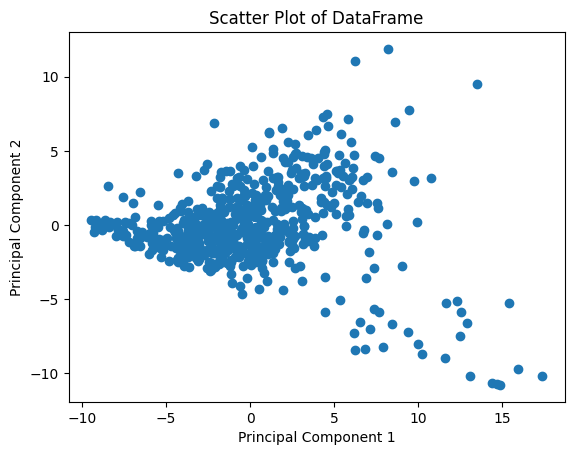

In [22]:
plt.scatter(pca_df["Principal Component 1"], pca_df["Principal Component 2"])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Scatter Plot of DataFrame")
plt.show()

## Exportación de la data limpia sin lags

In [78]:
exogen_data["Date"] = df_merged["Date"]
exogen_data["energy_price"] = df_merged["energy_price"]
scaled_df.to_csv("processed_tables/merged_without_lags.csv", index=False)

## Exportación de la data limpia con lags

In [ ]:
exogen_data_with_lags = exogen_data.copy()